In [1]:
# only adjust settings in this cell
state = 'NM'
k = 3                 # the state has this number of districts
enumeration_limit = 10

In [2]:
filepath = 'C:\\districting-data-2020-reprojection\\'
filename = state + '_county.json'

from read import read_graph_from_json
G = read_graph_from_json( state, filepath + filename) 
k = G._k

In [3]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / k
print(f"When k = {k}, ideal_population = {round(ideal_population,2)}.")

When k = 3, ideal_population = 705840.67.


In [4]:
from optimization import iterative_refinement
from math import ceil, floor
import time

deviation = 1/2
max_deviation = 0.01 * ideal_population
plans = list()

while True:

    print("*****************************************")
    print(f"Trying deviation = {deviation}.")
    print("*****************************************")
    
    L = ceil( ideal_population - deviation )
    U = floor( ideal_population + deviation )

    start_time = time.perf_counter()
    plans += iterative_refinement(G, L, U, k, enumeration_limit=enumeration_limit, verbose=False)
    print("Total time =",round(time.perf_counter() - start_time,2))

    if deviation == max_deviation:
        break
    
    deviation *= 2
    deviation = min( deviation, max_deviation )
       

*****************************************
Trying deviation = 0.5.
*****************************************
Set parameter Username
Academic license - for non-commercial use only - expires 2026-04-01
Total time = 0.02
*****************************************
Trying deviation = 1.0.
*****************************************
Total time = 8.11
*****************************************
Trying deviation = 2.0.
*****************************************
Total time = 6.15
*****************************************
Trying deviation = 4.0.
*****************************************
Total time = 6.33
*****************************************
Trying deviation = 8.0.
*****************************************
Total time = 3.93
*****************************************
Trying deviation = 16.0.
*****************************************
Total time = 1.96
*****************************************
Trying deviation = 32.0.
*****************************************
Total time = 1.73
*************************

***************************************
obj_type = cut_edges
***************************************
Pareto front objective values: [[1354.3333333333721, 42], [1354.3333333333721, 42], [1510.6666666666279, 40], [3012.333333333372, 38], [3735.333333333372, 36], [5433.333333333372, 34]]


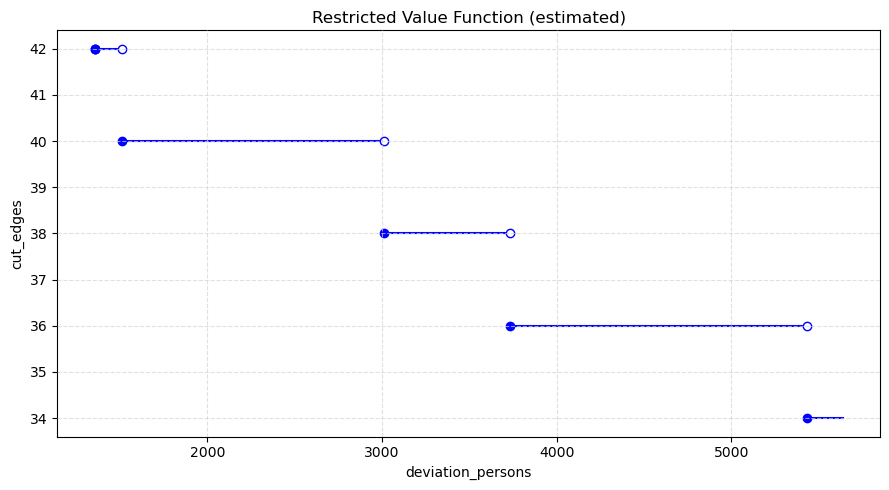

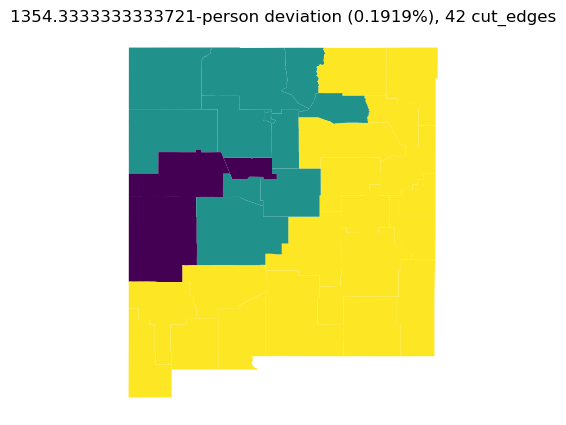

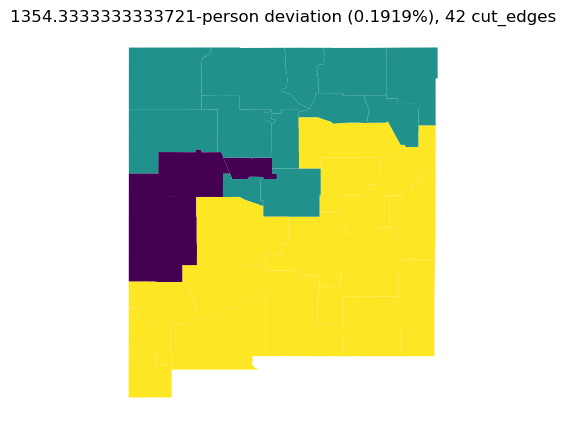

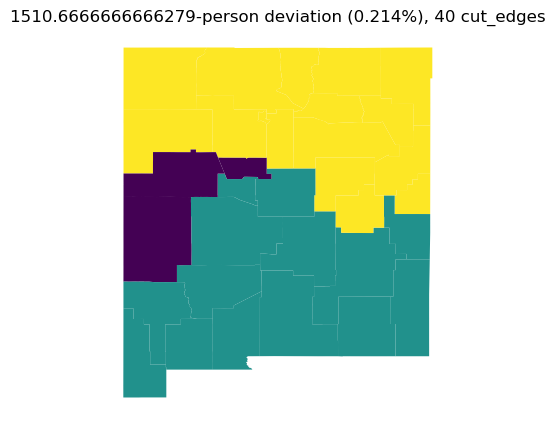

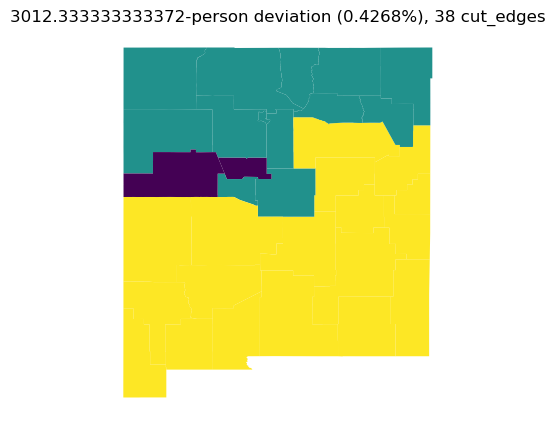

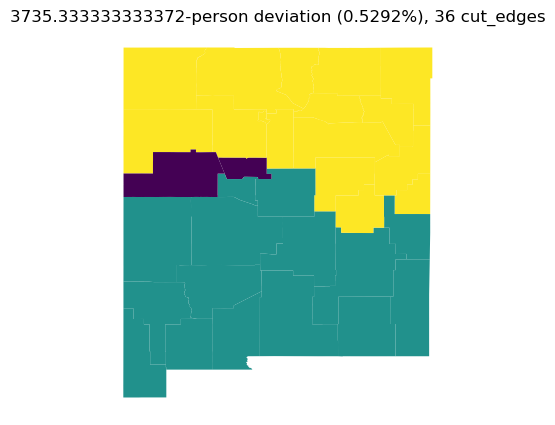

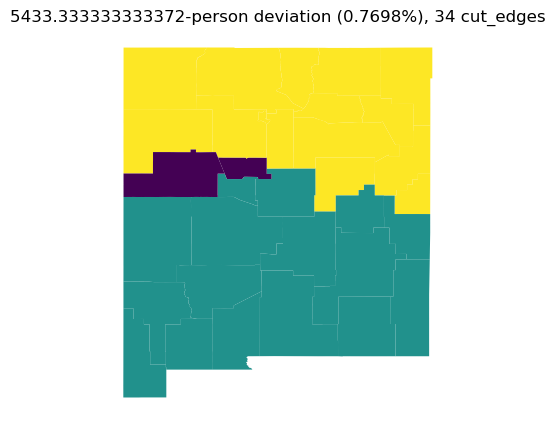

***************************************
obj_type = perimeter
***************************************
Pareto front objective values: [[1354.3333333333721, 55.50700622138527], [1510.6666666666279, 50.98912311192004], [3208.666666666628, 50.18372373556686], [3735.333333333372, 47.839336969480144], [5433.333333333372, 47.033937593126964]]


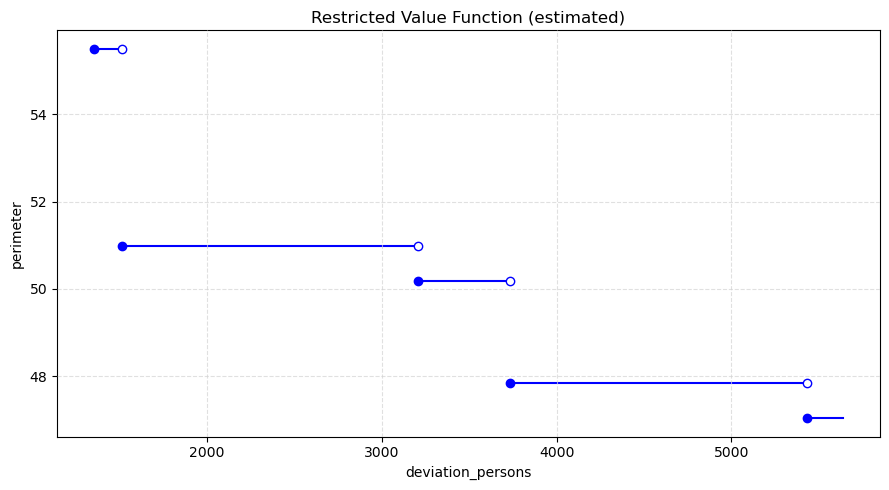

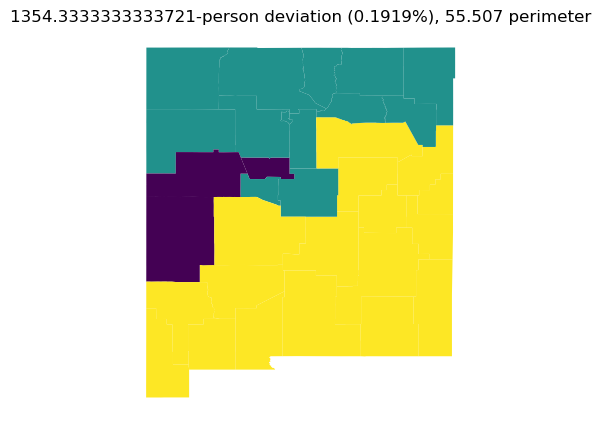

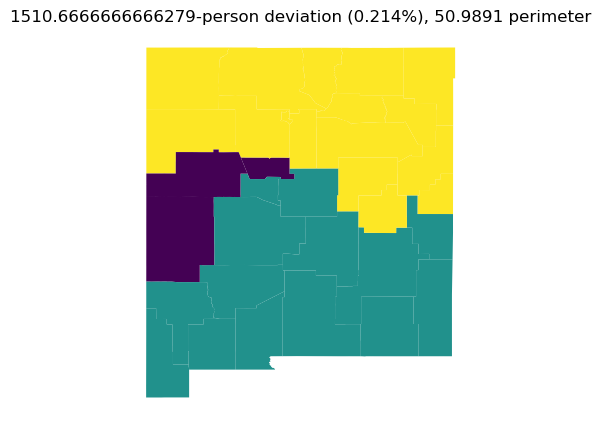

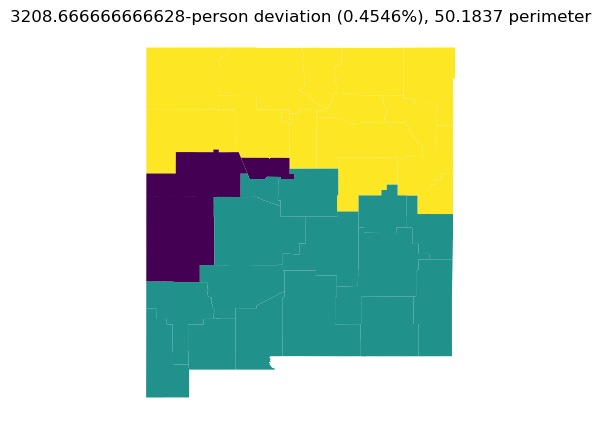

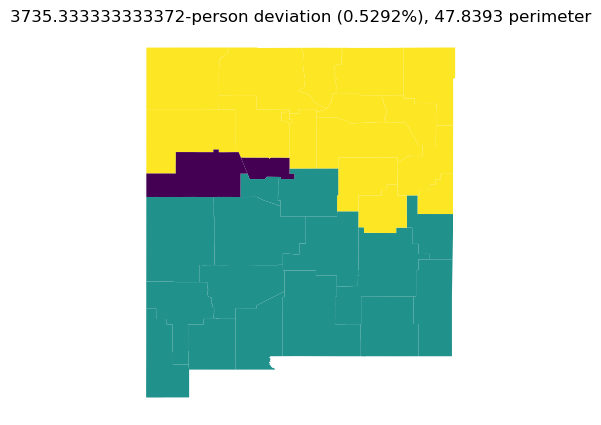

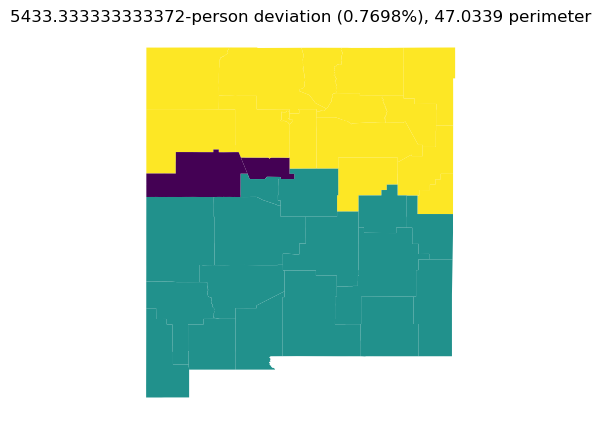

***************************************
obj_type = inverse_Polsby_Popper
***************************************
Pareto front objective values: [[1354.3333333333721, 2.8674776231990404], [1510.6666666666279, 2.4165485913761793], [3208.666666666628, 2.359282893226306], [5433.333333333372, 2.351294685741632]]


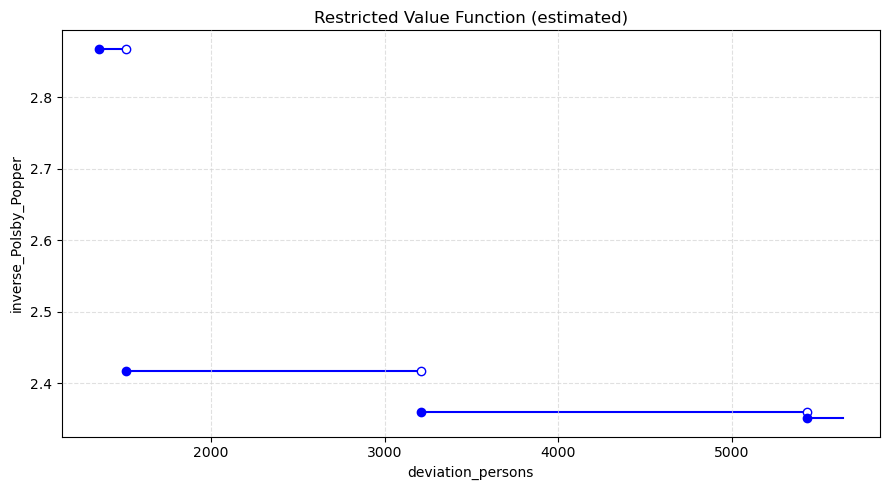

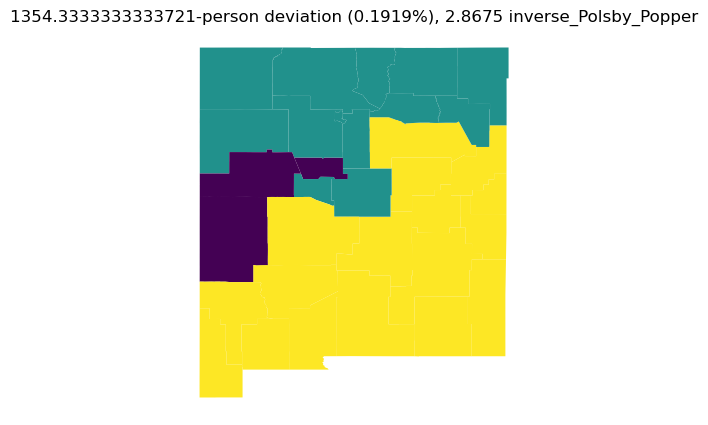

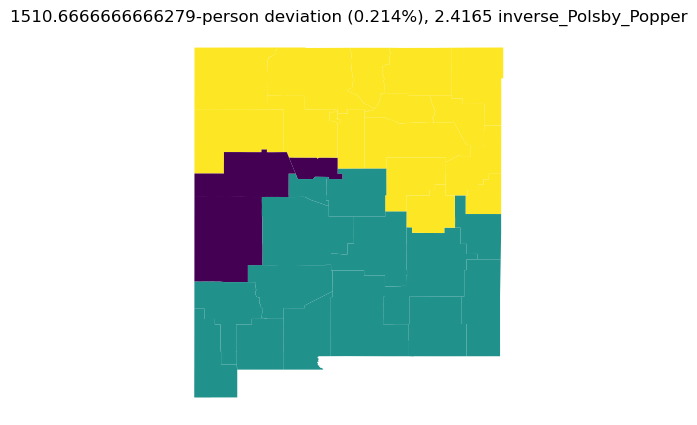

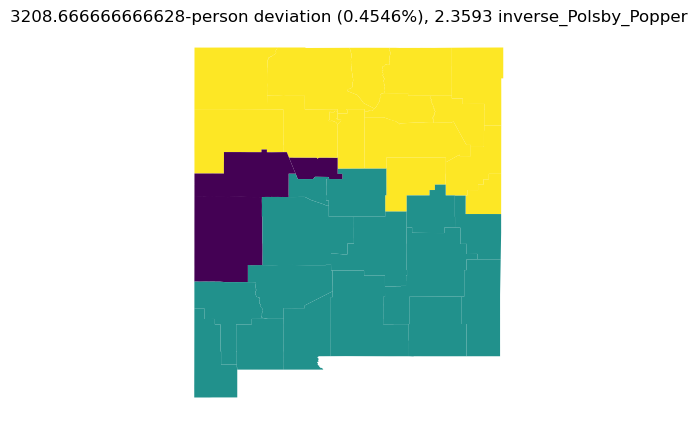

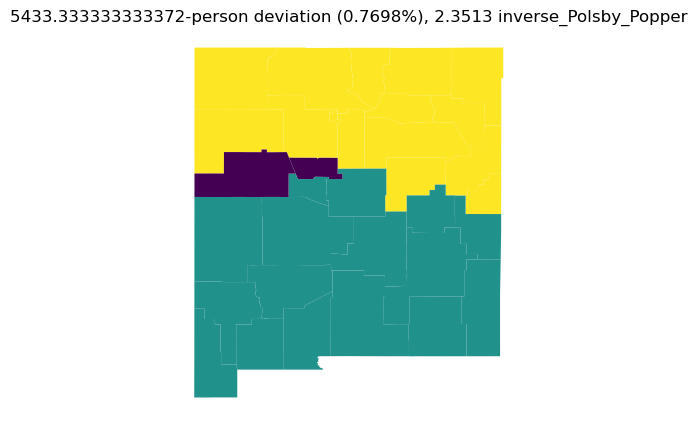

***************************************
obj_type = average_Polsby_Popper
***************************************
Pareto front objective values: [[1354.3333333333721, 0.3567720294858953], [1510.6666666666279, 0.415501415678718], [3208.666666666628, 0.42576644748134873], [5433.333333333372, 0.43342041766639655]]


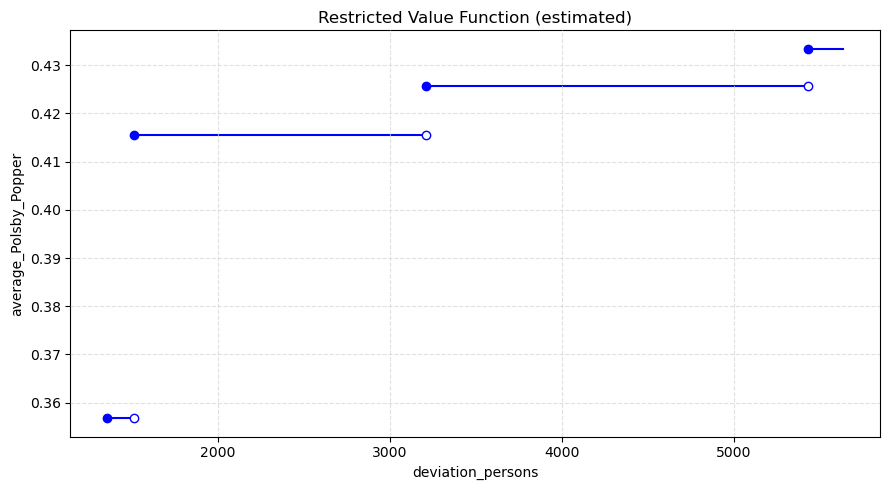

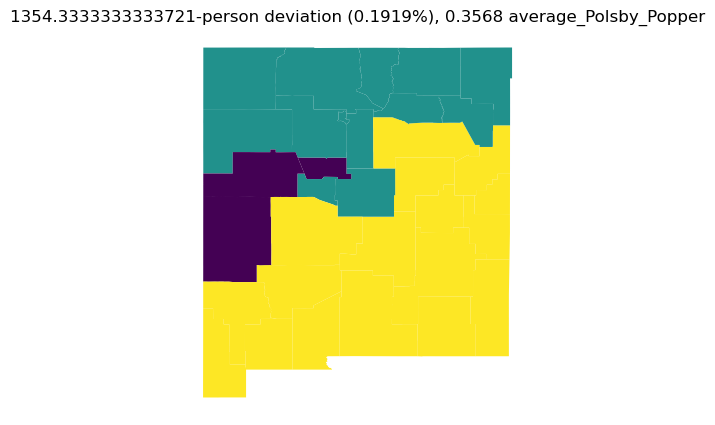

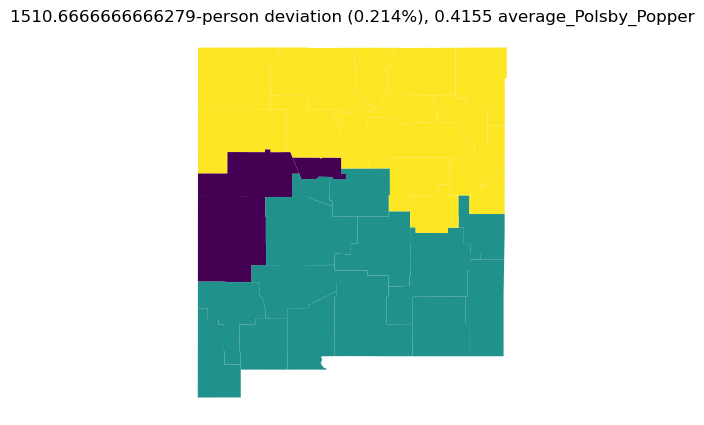

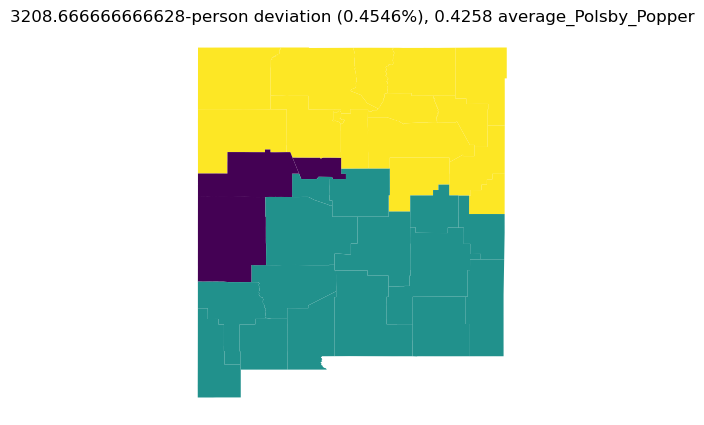

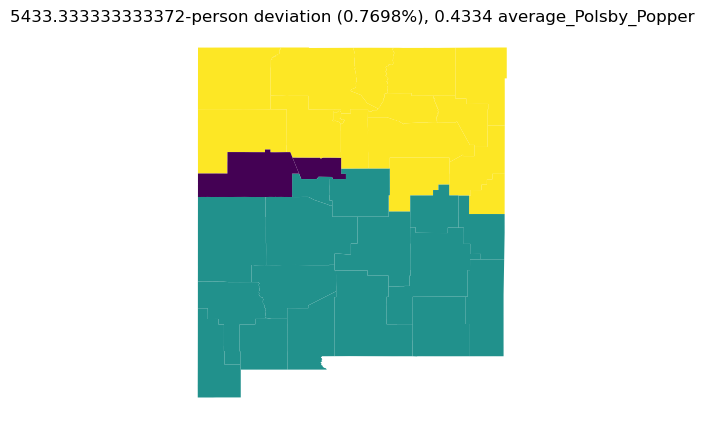

***************************************
obj_type = bottleneck_Polsby_Popper
***************************************
Pareto front objective values: [[1354.3333333333721, 0.2851744307921699], [1510.6666666666279, 0.3865841595621306]]


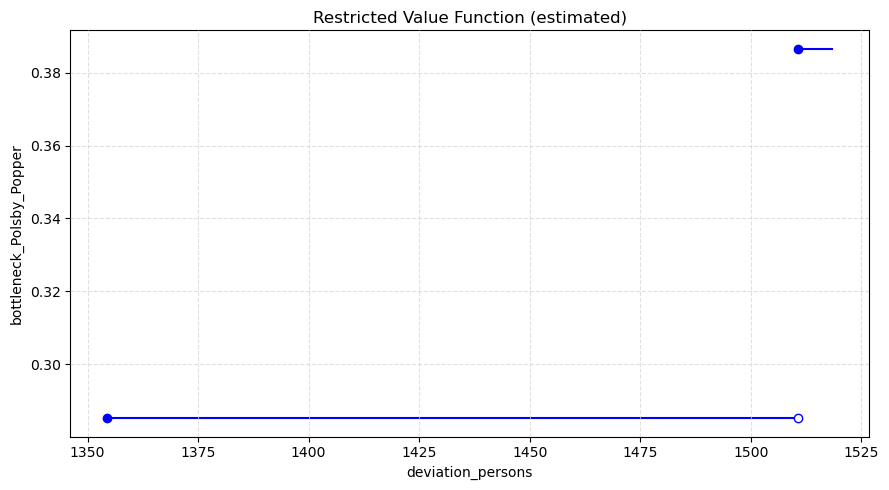

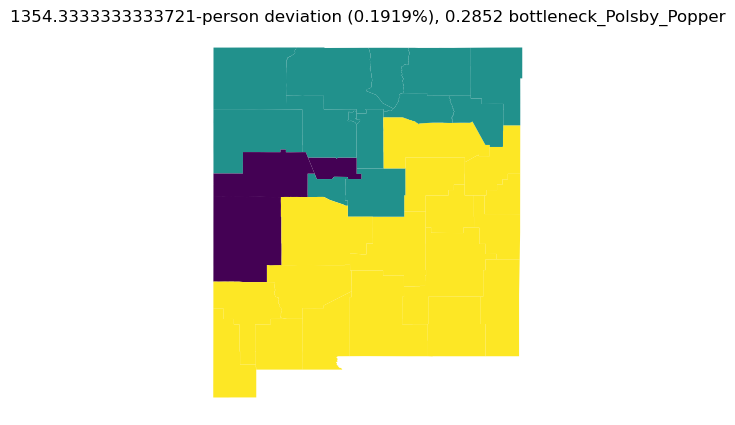

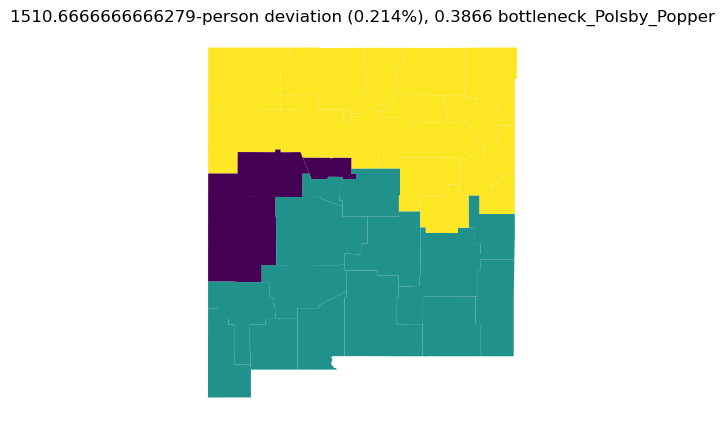

In [5]:
from pareto import ParetoFrontier
from metrics import *
from draw import draw_plan
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.shp'

# set dummy values... (because compute_obj checks plan feasibility...)
G._L = 0 
G._U = k * ideal_population
pareto = dict()

obj_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']

for obj_type in obj_types:

    print("***************************************")
    print("obj_type =", obj_type)
    print("***************************************")
    
    senses = ['min', 'max' if obj_type in ['average_Polsby_Popper', 'bottleneck_Polsby_Popper'] else 'min']
    obj_names = ['deviation_persons', obj_type]
    pareto[obj_type] = ParetoFrontier(senses, obj_names, state=state, level='county')
    
    for plan in plans:  
        dev = observed_deviation_persons(G, plan, ideal_population)
        obj = compute_obj(G, plan, obj_type)
        objval = [dev, obj]      
        
        # Add the plan and its objective values to the Pareto frontier
        pareto[obj_type].add_plan(plan, objval)
                
    # Print the Pareto frontier plans and objective values
    #print("Pareto front plans:", pareto[obj_type].plans)
    print("Pareto front objective values:", pareto[obj_type].objvals)
    
    # Set the limits accordingly
    pareto[obj_type].plot()   

    # Draw the plans from Pareto frontier
    pareto[obj_type].draw_plans()

In [6]:
print("plans =",plans)

plans = [[[13, 18, 25], [1, 3, 5, 6, 9, 10, 14, 15, 17, 22, 26, 28, 29, 32], [0, 2, 4, 7, 8, 11, 12, 16, 19, 20, 21, 23, 24, 27, 30, 31]], [[13, 18, 25], [2, 5, 7, 8, 11, 15, 19, 21, 23, 24, 30, 31], [0, 1, 3, 4, 6, 9, 10, 12, 14, 16, 17, 20, 22, 26, 27, 28, 29, 32]], [[13, 18, 25], [2, 5, 7, 8, 11, 15, 21, 24, 29, 30, 31], [0, 1, 3, 4, 6, 9, 10, 12, 14, 16, 17, 19, 20, 22, 23, 26, 27, 28, 32]], [[13, 18, 25], [2, 5, 7, 8, 11, 14, 15, 22, 24, 29, 30], [0, 1, 3, 4, 6, 9, 10, 12, 16, 17, 19, 20, 21, 23, 26, 27, 28, 31, 32]], [[13, 18, 25], [2, 5, 7, 8, 11, 15, 19, 21, 23, 24, 27, 30, 31], [0, 1, 3, 4, 6, 9, 10, 12, 14, 16, 17, 20, 22, 26, 28, 29, 32]], [[4, 5, 12, 13, 16], [0, 1, 3, 6, 9, 10, 14, 15, 17, 26, 29, 32], [2, 7, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 30, 31]], [[13, 18, 25], [3, 4, 6, 9, 10, 14, 15, 16, 17, 20, 22, 26, 28, 29, 32], [0, 1, 2, 5, 7, 8, 11, 12, 19, 21, 23, 24, 27, 30, 31]], [[13, 18, 25], [0, 1, 3, 4, 6, 9, 10, 12, 14, 16, 17, 19, 20, 22, 23, 26, 27, 28,

In [7]:
len(plans)

146